### Mount the Drive for google colab

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### Import the necessary libraries for loading and viewing data

In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [3]:
# for google colab
#data_parent = '/content/drive/MyDrive/Data/AdienceBenchmarkGenderAndAgeClassification/'

#for local machine
data_parent = 'Dataset'
print(os.listdir(data_parent))

['faces', 'fold_0_data.txt', 'fold_1_data.txt', 'fold_2_data.txt', 'fold_3_data.txt', 'fold_4_data.txt']


#### I will use Audience dataset from kaggle in this project. you can access the data [here](https://www.kaggle.com/ttungl/adience-benchmark-gender-and-age-classification).There are 5 txt files with name fold_0_data.txt, fold_1_data.txt, fold_2_data.txt, fold_3_data.txt, fold_4_data.txt that contain the data along with faces folder which has all the trainning images

In [4]:
#load data
fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')


"""Add the data from all those files into single pandas dataframe and print the shape and info about it."""

total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)

"""print the top 5 records from the dataframe using.head() function."""
total_data.head()

user_id                original_image  face_id       age gender     x  \
0  30601258@N03  10399646885_67c7d20df9_o.jpg        1  (25, 32)      f     0   
1  30601258@N03  10424815813_e94629b1ec_o.jpg        2  (25, 32)      m   301   
2  30601258@N03  10437979845_5985be4b26_o.jpg        1  (25, 32)      f  2395   
3  30601258@N03  10437979845_5985be4b26_o.jpg        3  (25, 32)      m   752   
4  30601258@N03  11816644924_075c3d8d59_o.jpg        2  (25, 32)      m   175   

      y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0   414  1086  1383      -115                  30              17  
1   105   640   641         0                   0              94  
2   876   771   771       175                 -30              74  
3  1255   484   485       180                   0              47  
4    80   769   768       -75                   0              34

### Data Exploration EDA

In [5]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


# Gender Data Visualization

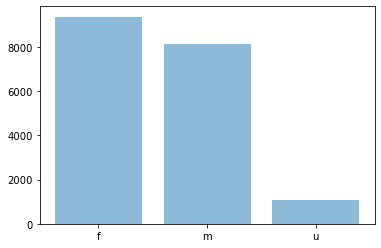

In [6]:
"""plot a bar graph for gender values"""

#bar chart
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

<AxesSubplot:ylabel='gender'>

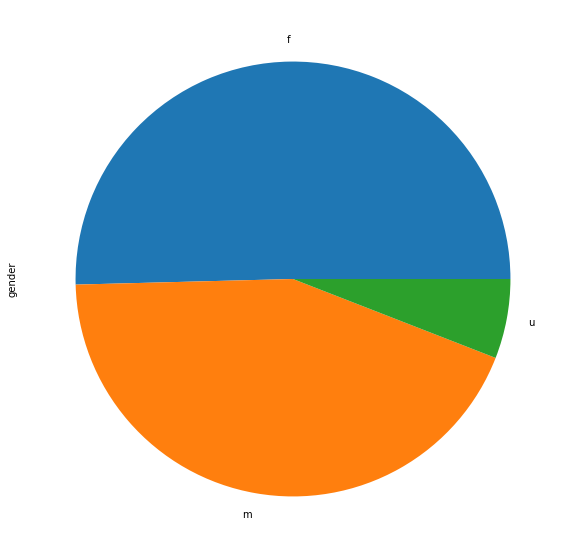

In [7]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(10, 10))

# Age Data Visualization

<AxesSubplot:ylabel='age'>

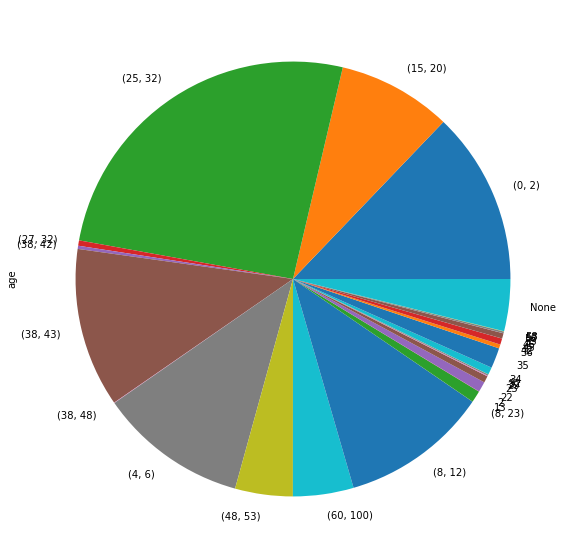

In [8]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 10))

[+] Image path: Dataset\faces\30601258@N03\coarse_tilt_aligned_face.1.10399863183_a04f4c26a1_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: f


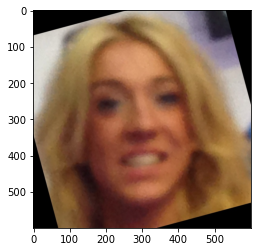

In [9]:
"""Load the first sample data and check it."""
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

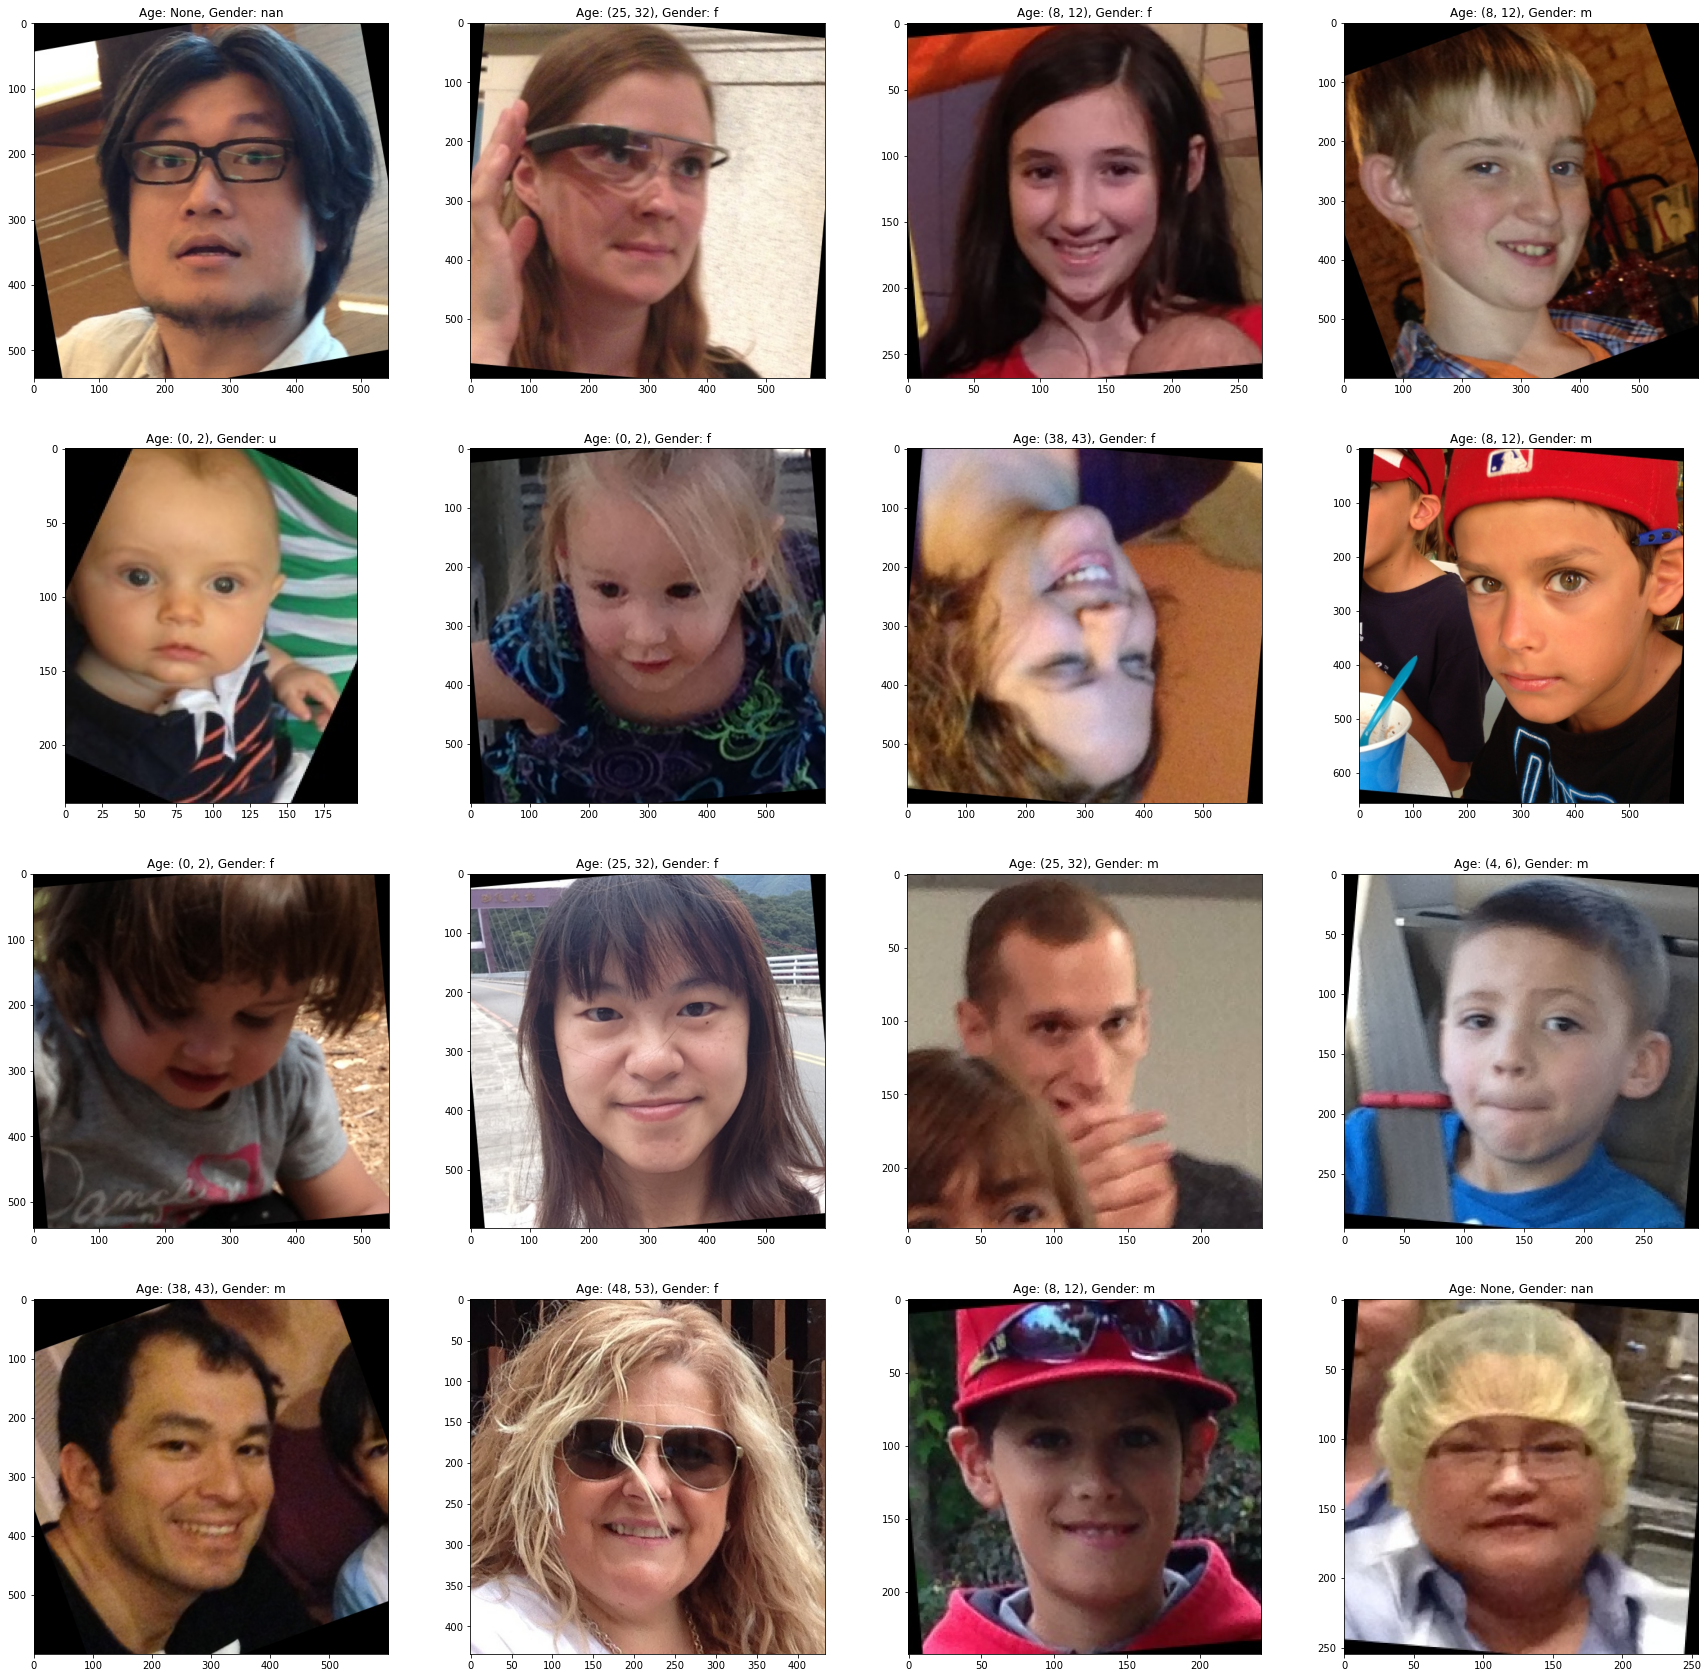

In [10]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(30,30))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

### Data Processing

In [11]:
"""create an age mapping dictionary and map each age data from dataset to an age group
drop the records that do not have a correct age value
"""
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'),
               ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'),
               ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'),
               ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'),
               ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'),
               ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

C:\Users\hussa\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

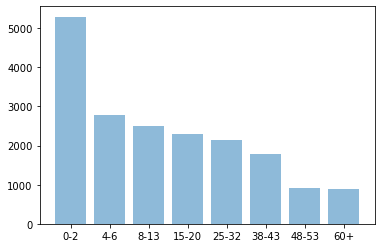

In [12]:
"""plot a bar graph for age values"""

#bar chart
age = ['0-2','4-6','8-13','15-20','25-32','38-43','48-53','60+']
plt.bar(age, total_data.age.value_counts(), align='center', alpha=0.5)
plt.show()

In [13]:
"""drop the records that do not have a known gender associated with it
and print the stats for remaining data
"""
total_data = total_data.dropna()
total_data = total_data[total_data.gender != 'u'].copy() # drop 'u' value from gender column
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique(), len(total_data.gender.unique())

(array(['25-32', '38-43', '4-6', '60+', '15-20', '48-53', '8-13', '0-2'],
       dtype=object),
 8,
 array(['f', 'm'], dtype=object),
 2)

In [14]:
print(total_data.gender.unique())

['f' 'm']


# Change age and gender mapping 

In [15]:
"""map the gender to class labels 0 and 1 and print first five records to check"""
gender_map = {'f':0,
             'm':1}
"""map the ages to class labels 0 to 7 for each age group and print first 5 records to check"""
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

In [16]:
total_data

user_id                original_image  face_id  age  gender  \
0       30601258@N03  10399646885_67c7d20df9_o.jpg        1    4       0   
1       30601258@N03  10424815813_e94629b1ec_o.jpg        2    4       1   
2       30601258@N03  10437979845_5985be4b26_o.jpg        1    4       0   
3       30601258@N03  10437979845_5985be4b26_o.jpg        3    4       1   
4       30601258@N03  11816644924_075c3d8d59_o.jpg        2    4       1   
...              ...                           ...      ...  ...     ...   
19341  101515718@N03  10587826073_6663f5b654_o.jpg     2280    4       0   
19342  101515718@N03  10587571495_a61785cd06_o.jpg     2278    4       1   
19343  101515718@N03  10587571495_a61785cd06_o.jpg     2279    4       0   
19344   50458575@N08   9426695459_9e8b347604_o.jpg     2281    4       0   
19345   50458575@N08   9429464468_1bfc39ecfb_o.jpg     2281    4       0   

          x     y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  \
0         0   414  1086  1383      -115                  30              17   
1       301   105   640   641         0                   0              94   
2      2395   876   771   771       175                 -30              74   
3       752  1255   484   485       180                   0              47   
4       175    80   769   768       -75                   0              34   
...     ...   ...   ...   ...       ...                 ...             ...   
19341   718   748   492   492         0                   0              63   
19342    48   472   768   768       -15                   0              25   
19343   950     0   692   687        -5                   0              27   
19344   831   895   899   899         0                  15              59   
19345   653  1023   555   554         5                  30              70   

                                               full_path  
0      Dataset\faces\30601258@N03\coarse_tilt_aligned...  
1      Dataset\faces\30601258@N03\coarse_tilt_aligned...  
2      Dataset\faces\30601258@N03\coarse_tilt_aligned...  
3      Dataset\faces\30601258@N03\coarse_tilt_aligned...  
4      Dataset\faces\30601258@N03\coarse_tilt_aligned...  
...                                                  ...  
19341  Dataset\faces\101515718@N03\coarse_tilt_aligne...  
19342  Dataset\faces\101515718@N03\coarse_tilt_aligne...  
19343  Dataset\faces\101515718@N03\coarse_tilt_aligne...  
19344  Dataset\faces\50458575@N08\coarse_tilt_aligned...  
19345  Dataset\faces\50458575@N08\coarse_tilt_aligned...  

[17452 rows x 13 columns]

In [17]:
# convert age and gender labels into list
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], len(train_paths)

(17452, 0, 17452, 4, 17452)

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# change the age and gender list into unmpy array and do one hot encoding
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
gender_labels = np.array(list(gender_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray()
gender_labels = enc.fit_transform(gender_labels).toarray()

In [20]:
# split the data
train_split = 0.75
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)

train data count:


(13089, 13089, 13089)

In [21]:
print("validation data count:")
len(validation_data), len(validation_labels_gender), len(validation_labels_age)

validation data count:


(4363, 4363, 4363)

In [22]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

In [23]:
# Create the tensorflow's pipline for age model
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

In [24]:
total_data.gender.value_counts()

0    9332
1    8120
Name: gender, dtype: int64

In [25]:
total_data.age.value_counts()

4    5240
5    2776
2    2285
1    2139
3    1790
0    1418
6     909
7     895
Name: age, dtype: int64

In [26]:
# for path, target1,target2 in train_dataset.take(1):
#     print(path, target1,target2)
for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'Dataset\\faces\\39411334@N02\\coarse_tilt_aligned_face.415.11043667374_e31fa4fdac_o.jpg', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float64)


In [27]:
def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [28]:
import multiprocessing

In [29]:
train_batches = train_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(64).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(64).prefetch(tf.data.experimental.AUTOTUNE)

(64, 128, 128, 3) (64, 8)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


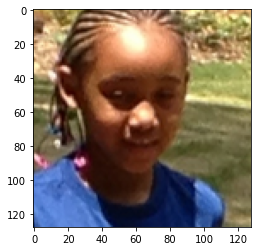

In [30]:
for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

### Build CNN for Age model

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.45),

    tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.5), 
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

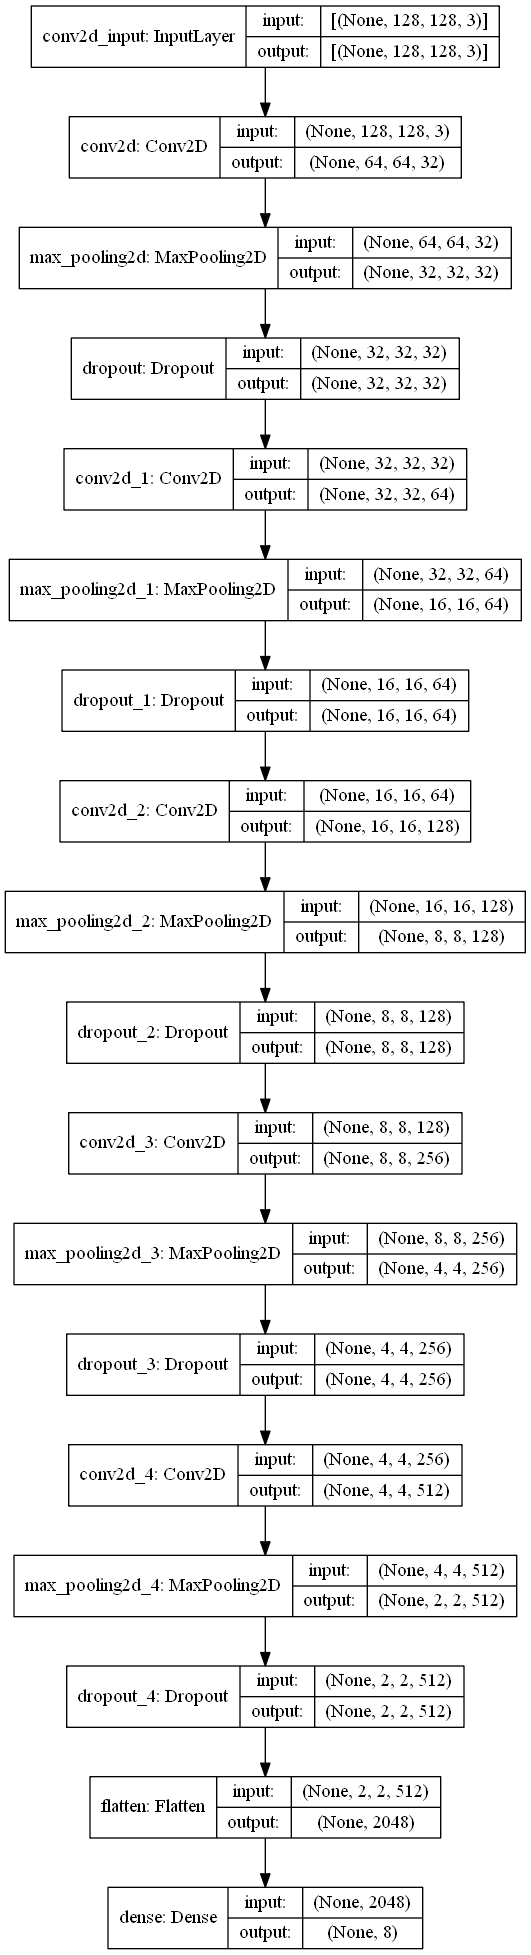

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Age model trainning

In [33]:
"""since the dataset is imblance and we noticed that there are bias towards (25-32) age group and in less bias trends
towards other age groups, I applied class weights according to each age group percentage in the dataset.
then I fed those class weights during the model fitting on the dataset"""
class_weights = {0: 3.7,
                  1: 2.45,
                  2: 2.29,
                  3: 2.93,
                  4: 1,
                  5: 1.89,
                  6: 5.76,
                  7: 5.85}
history = model.fit(train_batches, epochs=10, validation_data = validation_batches, class_weight=class_weights)

#save the model
model.save('age_model.h5')
print("Save model to disk")

Epoch 1/10
205/205 [==============================] - 132s 644ms/step - loss: 4.9532 - accuracy: 0.1480 - val_loss: 2.0622 - val_accuracy: 0.1513
Epoch 2/10
205/205 [==============================] - 184s 899ms/step - loss: 4.8469 - accuracy: 0.1827 - val_loss: 1.9911 - val_accuracy: 0.2116
Epoch 3/10
205/205 [==============================] - 176s 859ms/step - loss: 4.6030 - accuracy: 0.2221 - val_loss: 1.8604 - val_accuracy: 0.2689
Epoch 4/10
205/205 [==============================] - 176s 861ms/step - loss: 4.3336 - accuracy: 0.2596 - val_loss: 1.7704 - val_accuracy: 0.2893
Epoch 5/10
205/205 [==============================] - 175s 855ms/step - loss: 4.1554 - accuracy: 0.2889 - val_loss: 1.6947 - val_accuracy: 0.3330
Epoch 6/10
205/205 [==============================] - 176s 860ms/step - loss: 4.0308 - accuracy: 0.3076 - val_loss: 1.6445 - val_accuracy: 0.3447
Epoch 7/10
205/205 [==============================] - 176s 858ms/step - loss: 3.8889 - accuracy: 0.3239 - val_loss: 1.5984 -

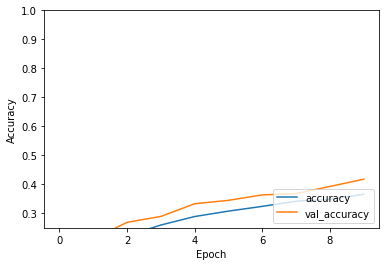

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.25, 1])
plt.legend(loc='lower right')

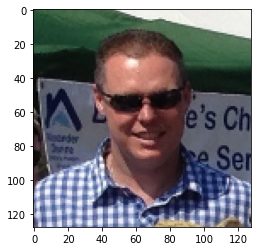

In [35]:
image_path = validation_data[185]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [36]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [37]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 

[+] prediction is : 48-53


# Build Gender Model

# Important Notice
### The initial plan for this project was to create age and gender recognition model. but due the sentivity of the idea that this model maybe will be misuse by use it to discriminate against the transgender community and for the ethical resposibility towrads the society, and after consulting with the education team of Lighthouse Labs, we decided to abort the gender model and keep the age model as the core one for this project. However, I will show how I built the gender model, but I will not proceed for the deployment and production phase for it.###

In [ ]:
# train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
# validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

In [ ]:
# for path, target1 in train_dataset2.take(1):
#     print(path, target1)

In [ ]:
# def preprocess_func(path, label_gender):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [128, 128]) / 255.0
        
#     return image, label_gender

In [ ]:
# train_batches2 = train_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(128).prefetch(tf.data.experimental.AUTOTUNE)
# validation_batches2 = validation_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(128).prefetch(tf.data.experimental.AUTOTUNE)

(256, 128, 128, 3) (256, 8)
tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float64)


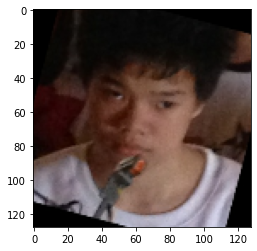

In [ ]:
# for image, target1 in train_batches.take(1):
#     print(image.shape, target1.shape)
#     image = tf.squeeze(image[0])
#     print(target1[0])

#     plt.imshow(image)
#     plt.show()
#     break

### Build CNN for Gender model

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, 3, padding='same', strides=2, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.4),
    
#     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.4),
    
#     tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.4),
    
#     tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.4),
    
#     tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.5), 
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(2, activation = 'sigmoid')
# ])

# model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
# model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_255 (Conv2D)          (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_245 (MaxPoolin (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_246 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_246 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_247 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_257 (Conv2D)          (None, 16, 16, 128)     

In [ ]:
# class_weights = {0: 1,
#                  1: 1.15}
# history = model.fit(train_batches2, epochs=250, validation_data = validation_batches2, class_weight=class_weights)

# model.save('gender_model.h5')
# print("Save model to disk")

Epoch 1/250
103/103 [==============================] - 21s 200ms/step - loss: 0.7308 - accuracy: 0.5460 - val_loss: 0.6656 - val_accuracy: 0.6218
Epoch 2/250
103/103 [==============================] - 3s 25ms/step - loss: 0.6857 - accuracy: 0.6314 - val_loss: 0.6173 - val_accuracy: 0.6523
Epoch 3/250
103/103 [==============================] - 2s 24ms/step - loss: 0.6449 - accuracy: 0.6710 - val_loss: 0.5872 - val_accuracy: 0.6986
Epoch 4/250
103/103 [==============================] - 2s 24ms/step - loss: 0.5977 - accuracy: 0.7062 - val_loss: 0.5535 - val_accuracy: 0.7201
Epoch 5/250
103/103 [==============================] - 3s 25ms/step - loss: 0.5618 - accuracy: 0.7299 - val_loss: 0.5273 - val_accuracy: 0.7458
Epoch 6/250
103/103 [==============================] - 3s 25ms/step - loss: 0.5379 - accuracy: 0.7489 - val_loss: 0.5000 - val_accuracy: 0.7653
Epoch 7/250
103/103 [==============================] - 2s 24ms/step - loss: 0.5148 - accuracy: 0.7667 - val_loss: 0.4987 - val_accurac

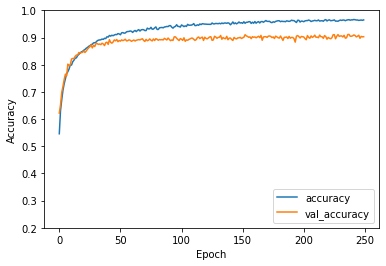

In [ ]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.2, 1])
# plt.legend(loc='lower right')

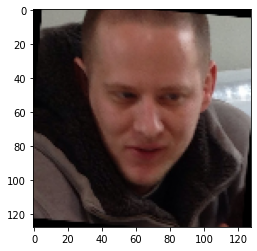

In [ ]:
# image_path = validation_data[120]
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image, (128, 128)) / 255.0
# plt.imshow(image)
# plt.show()

In [ ]:
# image = np.expand_dims(image, 0)
# prediction = model.predict(image)

In [ ]:
# index = np.argmax(prediction)
# decoding = {0:'Female', 1:'Male'}

# print('[+] prediction is :', decoding[index])

[+] prediction is : Male
